In [1]:
import pandas as pd
from btc_data import BtcData
from datetime import datetime
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.graph_objs as go

In [2]:
btc_database = BtcData()

100%|██████████| 18/18 [00:28<00:00,  1.57s/it]


In [3]:
btc_database.data

transactions_BIC       size_BIC  sentbyaddress_BIC  \
2009-01-03               0.0     204.000000                0.0   
2009-01-04               0.0     192.333333                0.0   
2009-01-05               0.0     180.666667                0.0   
2009-01-06               0.0     169.000000                0.0   
2009-01-07               0.0     157.333333                0.0   
2009-01-08               0.0     145.666667                0.0   
2009-01-09               0.0     134.000000                1.0   
2009-01-10               0.0     134.230000                1.0   
2009-01-11               0.0     134.409000                1.0   
2009-01-12               7.0     153.372000                7.0   
2009-01-13               4.0     134.667000               10.0   
2009-01-14               1.0     138.194000               20.0   
2009-01-15               8.0     157.579000               18.0   
2009-01-16               2.0     139.870000               16.0   
2009-01-17               1.5     134.853000               18.0   
2009-01-18               1.0     138.944000               16.0   
2009-01-19               2.0     151.896000               22.0   
2009-01-20               1.0     143.728000               21.0   
2009-01-21               1.0     137.990000               22.0   
2009-01-22               1.0     147.747000               12.0   
2009-01-23               2.0     148.238000               18.0   
2009-01-24               1.0     141.060000               22.0   
2009-01-25               1.0     136.000000               14.0   
2009-01-26               1.0     158.948000               17.0   
2009-01-27               1.0     139.309000                8.0   
2009-01-28               1.0     134.652000               23.0   
2009-01-29               1.0     146.256000               24.0   
2009-01-30               1.0     134.872000               23.0   
2009-01-31               1.0     151.464000               36.0   
2009-02-01               1.0     137.204000               31.0   
...                      ...            ...                ...   
2018-10-26          252859.0  778272.000000           390481.0   
2018-10-27          233613.0  693978.000000           337030.0   
2018-10-28          219720.0  658009.000000           319437.0   
2018-10-29          269608.0  755671.000000           387488.0   
2018-10-30          283173.0  736163.000000           399667.0   
2018-10-31          288120.0  713981.000000           404384.0   
2018-11-01          281787.0  740358.000000           400937.0   
2018-11-02          292561.0  835021.000000           440762.0   
2018-11-03          249403.0  662372.000000           364285.0   
2018-11-04          226124.0  783237.000000           326880.0   
2018-11-05          296139.0  798833.000000           421388.0   
2018-11-06          285323.0  823237.000000           409407.0   
2018-11-07          293604.0  845533.000000           408338.0   
2018-11-08          277476.0  869253.000000           389692.0   
2018-11-09          283769.0  852298.000000           419459.0   
2018-11-10          252368.0  723726.000000           350669.0   
2018-11-11          246845.0  693608.000000           327589.0   
2018-11-12          299866.0  830166.000000           395198.0   
2018-11-13          279040.0  845026.000000           382180.0   
2018-11-14          292620.0  823903.000000           405842.0   
2018-11-15          291398.0  909081.000000           406523.0   
2018-11-16          282998.0  860424.000000           410160.0   
2018-11-17          262504.0  701252.000000           334661.0   
2018-11-18          239680.0  747156.000000           299123.0   
2018-11-19          267845.0  841793.000000           356638.0   
2018-11-20          288318.0  889450.000000           405546.0   
2018-11-21          254837.0  913929.000000           338227.0   
2018-11-22          265994.0  903052.000000           310567.0   
2018-11-23          275136.0  872986.000000         

In [6]:
data = btc_database.data

In [7]:
btc_database.current_time.date()

datetime.date(2018, 11, 24)

In [8]:
data.columns

Index(['transactions_BIC', 'size_BIC', 'sentbyaddress_BIC', 'difficulty_BIC',
       'hashrate_BIC', 'price_BIC', 'mining_profitability_BIC',
       'sentinusd_BIC', 'transactionfees_BIC', 'median_transaction_fee_BIC',
       'confirmationtime_BIC', 'marketcap_BIC', 'transactionvalue_BIC',
       'mediantransactionvalue_BIC', 'tweets_BIC', 'google_trends_BIC',
       'activeaddresses_BIC', 'top100cap_BIC', 'market_price_BI',
       'avg_block_size_BI', 'n_transactions_BI', 'mempool_size_BI',
       'total_bitcoins_BI', 'market_cap_BI', 'trade_volume_BI',
       'blocks_size_BI', 'n_orphaned_blocks_BI', 'n_transactions_per_block_BI',
       'median_confirmation_time_BI', 'hash_rate_BI', 'difficulty_BI',
       'miners_revenue_BI', 'transaction_fees_BI', 'transaction_fees_usd_BI',
       'cost_per_transaction_percent_BI', 'cost_per_transaction_BI',
       'n_unique_addresses_BI', 'n_transactions_total_BI',
       'transactions_per_second_BI', 'mempool_count_BI', 'mempool_growth_BI',
    

In [9]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [104]:
def plot(charts: list, log_scale: list):
    plot_data=[]
    yaxises = {}
    n_charts = len(charts)
    y_label_width = 0.065
    scale = ['log' if k in log_scale else '-' for k in np.arange(n_charts)]
    for i,c in enumerate(charts):
        if i == 0:
            single_plot = go.Scatter(x=data.index,
                              y=data[c],
                              name=c,
                              fill='tonexty')
            yaxises['yaxis'] = dict(title=c,
                                   type=scale[i])
        else:
            single_plot = go.Scatter(x=data.index,
                              y=data[c],
                              name=c,
                              fill='tonexty',
                             yaxis='y'+str(i+1))
            yaxises['yaxis'+str(i+1)] = dict(title=c,
                                             overlaying='y',
                                            type=scale[i],
                                            side='left',
                                            position = i*y_label_width)
        plot_data.append(single_plot)
        layout = go.Layout(title='BTC',
                           xaxis=dict(
                                   domain=[n_charts*y_label_width, 1]),
                           **yaxises,
                           legend=dict(x=0, y=1.2))
                            
    fig = go.Figure(data=plot_data, layout=layout)
    py.offline.iplot(fig)

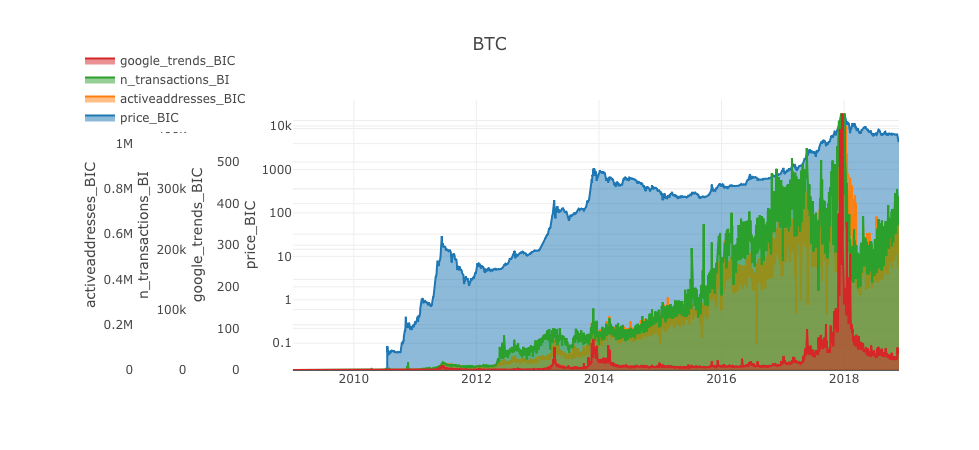

In [106]:
plot(['price_BIC', 'activeaddresses_BIC', 'n_transactions_BI', 'google_trends_BIC'], log_scale=[0])

In [69]:
plot_data = [
    go.Scatter(
        x=data.index,
        y=data['n_unique_addresses_BI'],
        name='n_unique_addresses_BI',
        fill='tonexty'
    ),
    go.Scatter(
        x=data.index,
        y=data['market_price_BI'],
        name='market_price_BI',
        fill='tonexty',
        yaxis='y2'
    ),
    go.Scatter(
        x=data.index,
        y=data['activeaddresses_BIC'],
        name='activeaddresses_BIC',
        fill='tonexty',
        yaxis='y3'    
    )
]
layout = go.Layout(
    title='BTC',
    xaxis=dict(
        domain=[0.1, 1]
    ),
    yaxis=dict(
        title='n_unique_addresses_BI'
    ),
    yaxis2=dict(
        title='market price BI',
        overlaying='y',
        type='log',
        side='right'
    ),
    yaxis3=dict(
        title='activeaddresses BIC',
        overlaying='y',
        side='left',
        position=0.05
    )
)
fig = go.Figure(data=plot_data,
                layout=layout
               )

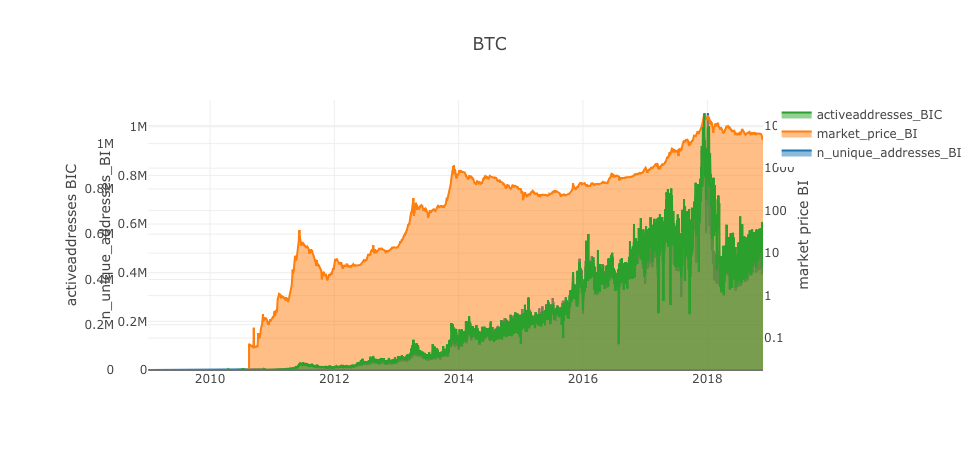

In [70]:
py.offline.iplot(fig)

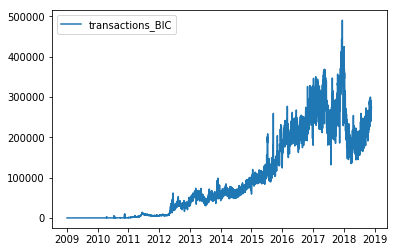

In [19]:
data[['transactions_BIC']].plot()